Name: Ekansh Somani
Roll: 20110065

What is this file?

Q2 in the assignment required a lot of kernel processing. This is my code to do all the processing, extract the data and then process it to display graphs and answer questions.

This file is for **Case B: Double Data Type**. Refer to *processingData.ipynb* for **Case A: Integer Data Type**.

In [1]:
import subprocess
import re
from statistics import stdev

py_files = ["mult.py", "multNum.py"]
cp_file = "multDouble.cpp"
root = "Assignment 1/"
inputs = [64, 128, 256, 512, 1024]

In [2]:
def runCommand(command):
    result = subprocess.run(command, shell=True, text=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    return result.stdout

def parseOutput(output):
    values = re.findall(r'\d+\.\d+', output)
    values = [float(value) for value in values]
    return values

def printTables(table, language):

    print(f"| {language} |", " | ".join(map(str, inputs)), "|")
    print("| --- | --- | --- | --- | --- | ---- |")

    for key in table:
        vals = []
        sd = []
        for lis in table[key]:
            vals.append(sorted(lis)[1])
            sd.append(stdev(lis))

        formattedVal = [f"{median:.3f}±{std_dev:.3f}" for median, std_dev in zip(vals, sd)]
        print(f"| {key} |"," | ".join(map(str, formattedVal)), "|")
    
    proportion = []
    for i in range(5):
        meat = table["meat"][i]
        user = table["user"][i]
        sysT = table["sys"][i]

        proportion.append(sum([m/(u+s+0.01) for m, u, s in zip(meat, user, sysT)])/3)

    print("| prop |", " | ".join(f"{x:.3f}" for x in proportion), "|")
    print(sum(proportion)/5)


In [3]:
def testFile(file, language):
    table = {"meat": [], "real": [], "user": [], "sys": []}

    for n in inputs:
        meatTime = []
        realTime = []
        userTime = []
        sysTime = []
        for _ in range(3):

            if language=="C++": ans = runCommand(f"/usr/bin/time -p ./a {n}")
            else: ans = runCommand(f"/usr/bin/time -p python3 \"Assignment 1/{file}\" {n} 99.99")
            
            times = parseOutput(ans)
            
            meatTime.append(times[0])
            realTime.append(times[1])
            userTime.append(times[2])
            sysTime.append(times[3])

        table["meat"].append(meatTime)
        table["real"].append(realTime)
        table["user"].append(userTime)
        table["sys"].append(sysTime)
    
    printTables(table, language)

    return table

command = ["g++", "-o", "a", "Assignment 1/multDouble.cpp"]
subprocess.run(command)

CompletedProcess(args=['g++', '-o', 'a', 'Assignment 1/multDouble.cpp'], returncode=0)

In [4]:
cpp = testFile(cp_file, "C++")

| C++ | 64 | 128 | 256 | 512 | 1024 |
| --- | --- | --- | --- | --- | ---- |
| meat | 0.006±0.002 | 0.033±0.003 | 0.298±0.036 | 2.663±0.225 | 22.399±1.171 |
| real | 0.010±0.006 | 0.040±0.000 | 0.300±0.035 | 2.670±0.224 | 22.420±1.169 |
| user | 0.000±0.006 | 0.030±0.000 | 0.300±0.038 | 2.660±0.228 | 22.400±1.175 |
| sys | 0.000±0.006 | 0.000±0.006 | 0.000±0.000 | 0.000±0.000 | 0.010±0.006 |
| prop | 0.350 | 0.810 | 0.971 | 0.996 | 0.999 |
0.8252008922063341


In [5]:
pyth = testFile(py_files[0], "Python")

| Python | 64 | 128 | 256 | 512 | 1024 |
| --- | --- | --- | --- | --- | ---- |
| meat | 0.079±0.006 | 0.610±0.049 | 5.074±0.360 | 46.664±6.880 | 350.864±6.601 |
| real | 0.110±0.006 | 0.640±0.045 | 5.110±0.356 | 46.710±6.882 | 350.980±6.601 |
| user | 0.080±0.006 | 0.610±0.040 | 5.100±0.358 | 46.640±6.870 | 350.750±6.529 |
| sys | 0.000±0.006 | 0.000±0.006 | 0.010±0.010 | 0.040±0.006 | 0.170±0.072 |
| prop | 0.831 | 0.975 | 0.994 | 0.999 | 1.000 |
0.9598278695399358


In [7]:
nump = testFile(py_files[1], "Numpy")

| Numpy | 64 | 128 | 256 | 512 | 1024 |
| --- | --- | --- | --- | --- | ---- |
| meat | 0.000±0.000 | 0.008±0.003 | 0.009±0.002 | 0.013±0.000 | 0.056±0.023 |
| real | 0.180±0.015 | 0.220±0.021 | 0.200±0.036 | 0.190±0.012 | 0.260±0.032 |
| user | 1.030±0.055 | 1.260±0.155 | 1.070±0.012 | 1.060±0.046 | 1.540±0.272 |
| sys | 0.010±0.015 | 0.090±0.046 | 0.130±0.079 | 0.070±0.035 | 0.100±0.023 |
| prop | 0.000 | 0.005 | 0.007 | 0.012 | 0.039 |
0.012631899668762308


In [8]:
import matplotlib.pyplot as plt
from math import exp
import numpy as np
# from scipy.optimize import curve_fit

def model_func(x, a, b):
    return a*(exp(x))+b

def makePlot(clist, pylist, numlist, titleName):
    xFlat = np.repeat(inputs, [len(sublist) for sublist in clist])
    pyFlat = np.concatenate(pylist)
    numFlat = np.concatenate(numlist)
    cFlat = np.concatenate(clist)

    # cFlat = np.where(cFlat == 0, 1e-4, cFlat)
    # pyFlat = np.where(pyFlat == 0, 1e-4, pyFlat)
    # numFlat = np.where(numFlat == 0, 1e-4, numFlat)

    # cparams = curve_fit(model_func, xFlat, cFlat)
    # pyparams = curve_fit(model_func, xFlat, pyFlat)
    # numparams = curve_fit(model_func, xFlat, numFlat)

    # xFit = np.linspace(min(xFlat), max(xFlat), 100)

    # cFit = model_func(xFit, *cparams)
    # pyFit = model_func(xFit, *pyparams)
    # numFit = model_func(xFit, *numparams)

    
    plt.scatter(xFlat, cFlat, label="CPP")
    plt.scatter(xFlat, pyFlat, label="Python")
    plt.scatter(xFlat, numFlat, label="Numpy")

    # plt.plot(xFit, cFit, color='blue', label='C++')
    # plt.plot(xFit, pyFit, color='yellow', label='Python')
    # plt.plot(xFit, numFit, color='black', label='Numpy')

    plt.xlabel('N')
    plt.ylabel('Time')
    plt.yscale('log')
    plt.title(titleName)
    plt.legend()
    plt.show()

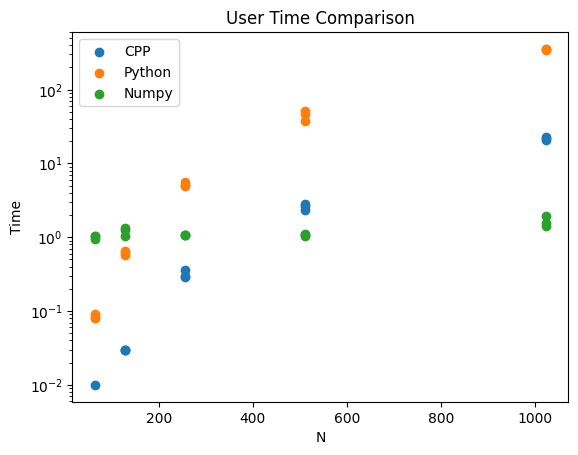

In [9]:
makePlot(cpp["user"], pyth["user"], nump["user"], "User Time Comparison")

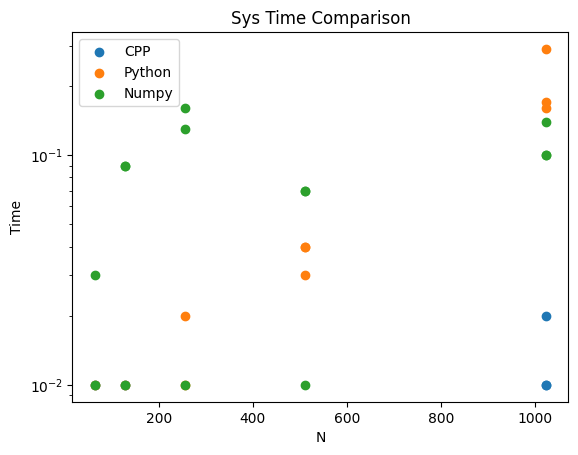

In [11]:
makePlot(cpp["sys"], pyth["sys"], nump["sys"], "Sys Time Comparison")